In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [418]:
df = pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [419]:
df.shape

(600, 6)

In [420]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 21.2+ KB


In [422]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


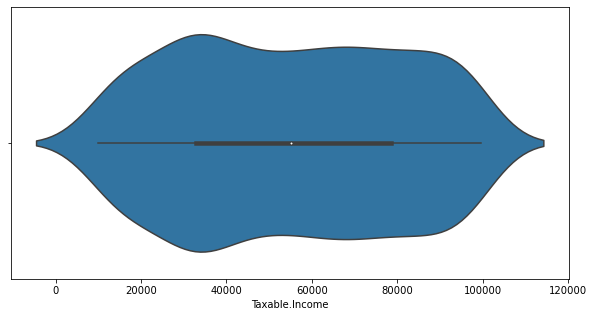

In [423]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Taxable.Income'])
plt.show()

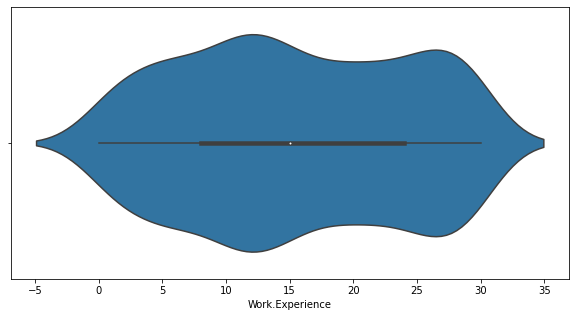

In [424]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Work.Experience'])
plt.show()

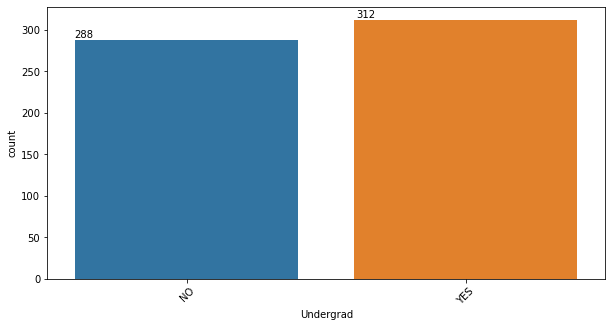

In [425]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['Undergrad'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
plt.show()

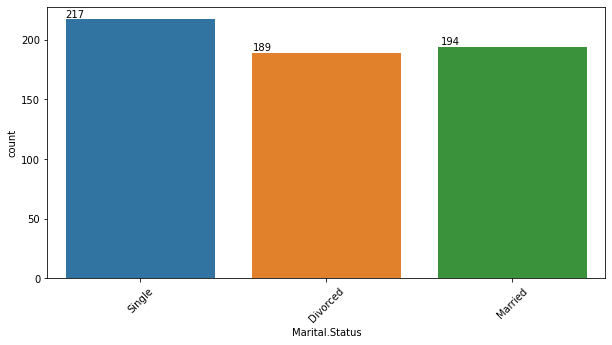

In [426]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['Marital.Status'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
plt.show()

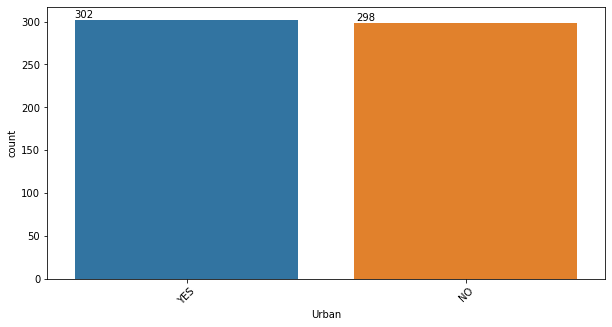

In [427]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['Urban'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
plt.show()

In [428]:
newdata = pd.DataFrame(df)
newdata

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [429]:
df= newdata.rename(columns= {"Marital.Status" : "marital_status", "Taxable.Income" : "tax_income", "City.Population" : "city_population",
         "Work.Experience" : "work_ex"}, inplace = True)


In [430]:
df

In [431]:
newdata["tax_status"] = np.where(newdata['tax_income']<=30000,'Risky','Good') 
newdata.head()

,Undergrad,marital_status,tax_income,city_population,work_ex,Urban,tax_status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [432]:
newdata.tax_status.unique()

array(['Good', 'Risky'], dtype=object)

In [433]:
newdata.drop(['tax_income', 'city_population'], axis=1, inplace= True)
newdata

,Undergrad,marital_status,work_ex,Urban,tax_status
0,NO,Single,10,YES,Good
1,YES,Divorced,18,YES,Good
2,NO,Married,30,YES,Good
3,YES,Single,15,YES,Good
4,NO,Married,28,NO,Good
...,...,...,...,...,...
595,YES,Divorced,7,YES,Good
596,YES,Divorced,2,YES,Good
597,NO,Divorced,0,YES,Good
598,YES,Married,17,NO,Good


In [434]:
X = newdata.iloc[:,:4]
X

,Undergrad,marital_status,work_ex,Urban
0,NO,Single,10,YES
1,YES,Divorced,18,YES
2,NO,Married,30,YES
3,YES,Single,15,YES
4,NO,Married,28,NO
...,...,...,...,...
595,YES,Divorced,7,YES
596,YES,Divorced,2,YES
597,NO,Divorced,0,YES
598,YES,Married,17,NO


In [435]:
Y = newdata.iloc[:,-1]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_status, Length: 600, dtype: object

In [436]:
newdata.tax_status.value_counts()

Good     476
Risky    124
Name: tax_status, dtype: int64

In [437]:
from sklearn.preprocessing import LabelEncoder

In [438]:
label = LabelEncoder()

In [439]:
newdata['Undergrad']= label.fit_transform(newdata['Undergrad']) 
newdata['marital_status']= label.fit_transform(newdata['marital_status']) 
newdata['Urban']= label.fit_transform(newdata['Urban'])

In [440]:
newdata

,Undergrad,marital_status,work_ex,Urban,tax_status
0,0,2,10,1,Good
1,1,0,18,1,Good
2,0,1,30,1,Good
3,1,2,15,1,Good
4,0,1,28,0,Good
...,...,...,...,...,...
595,1,0,7,1,Good
596,1,0,2,1,Good
597,0,0,0,1,Good
598,1,1,17,0,Good


<AxesSubplot:xlabel='Undergrad', ylabel='count'>

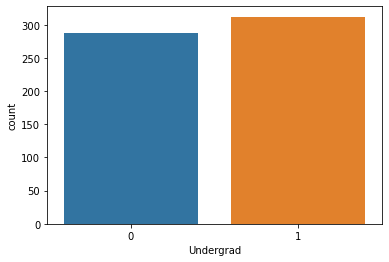

In [442]:
sns.countplot(newdata['Undergrad'])

# newdata['Undergrad'].value_counts()

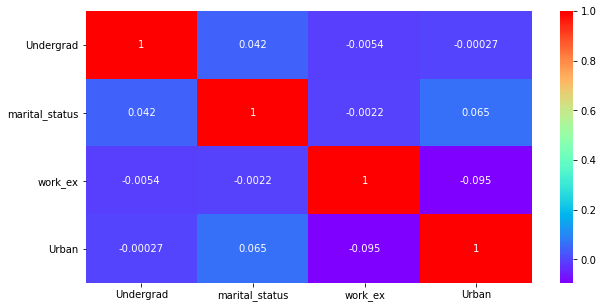

In [443]:
plt.figure(figsize = (10,5))
sns.heatmap(newdata.corr(), annot = True, cmap="rainbow")
plt.show()

In [444]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

newdata['Undergrad'] = label_encoder.fit_transform(newdata['Undergrad'])
newdata['marital_status'] = label_encoder.fit_transform(newdata['marital_status'])
newdata['Urban'] = label_encoder.fit_transform(newdata['Urban'])
newdata['tax_status'] = label_encoder.fit_transform(newdata['tax_status'])
newdata

,Undergrad,marital_status,work_ex,Urban,tax_status
0,0,2,10,1,0
1,1,0,18,1,0
2,0,1,30,1,0
3,1,2,15,1,0
4,0,1,28,0,0
...,...,...,...,...,...
595,1,0,7,1,0
596,1,0,2,1,0
597,0,0,0,1,0
598,1,1,17,0,0


In [445]:
X = newdata.drop('Undergrad', axis = 1)
y = newdata['Undergrad']

In [446]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=50)
X_train.shape, X_test.shape

((360, 4), (240, 4))

In [447]:
dt= DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [448]:
from sklearn import tree

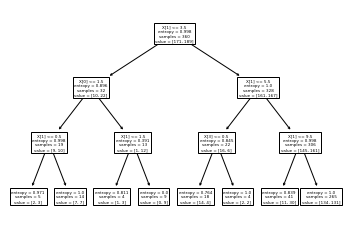

In [449]:
tree.plot_tree(dt);

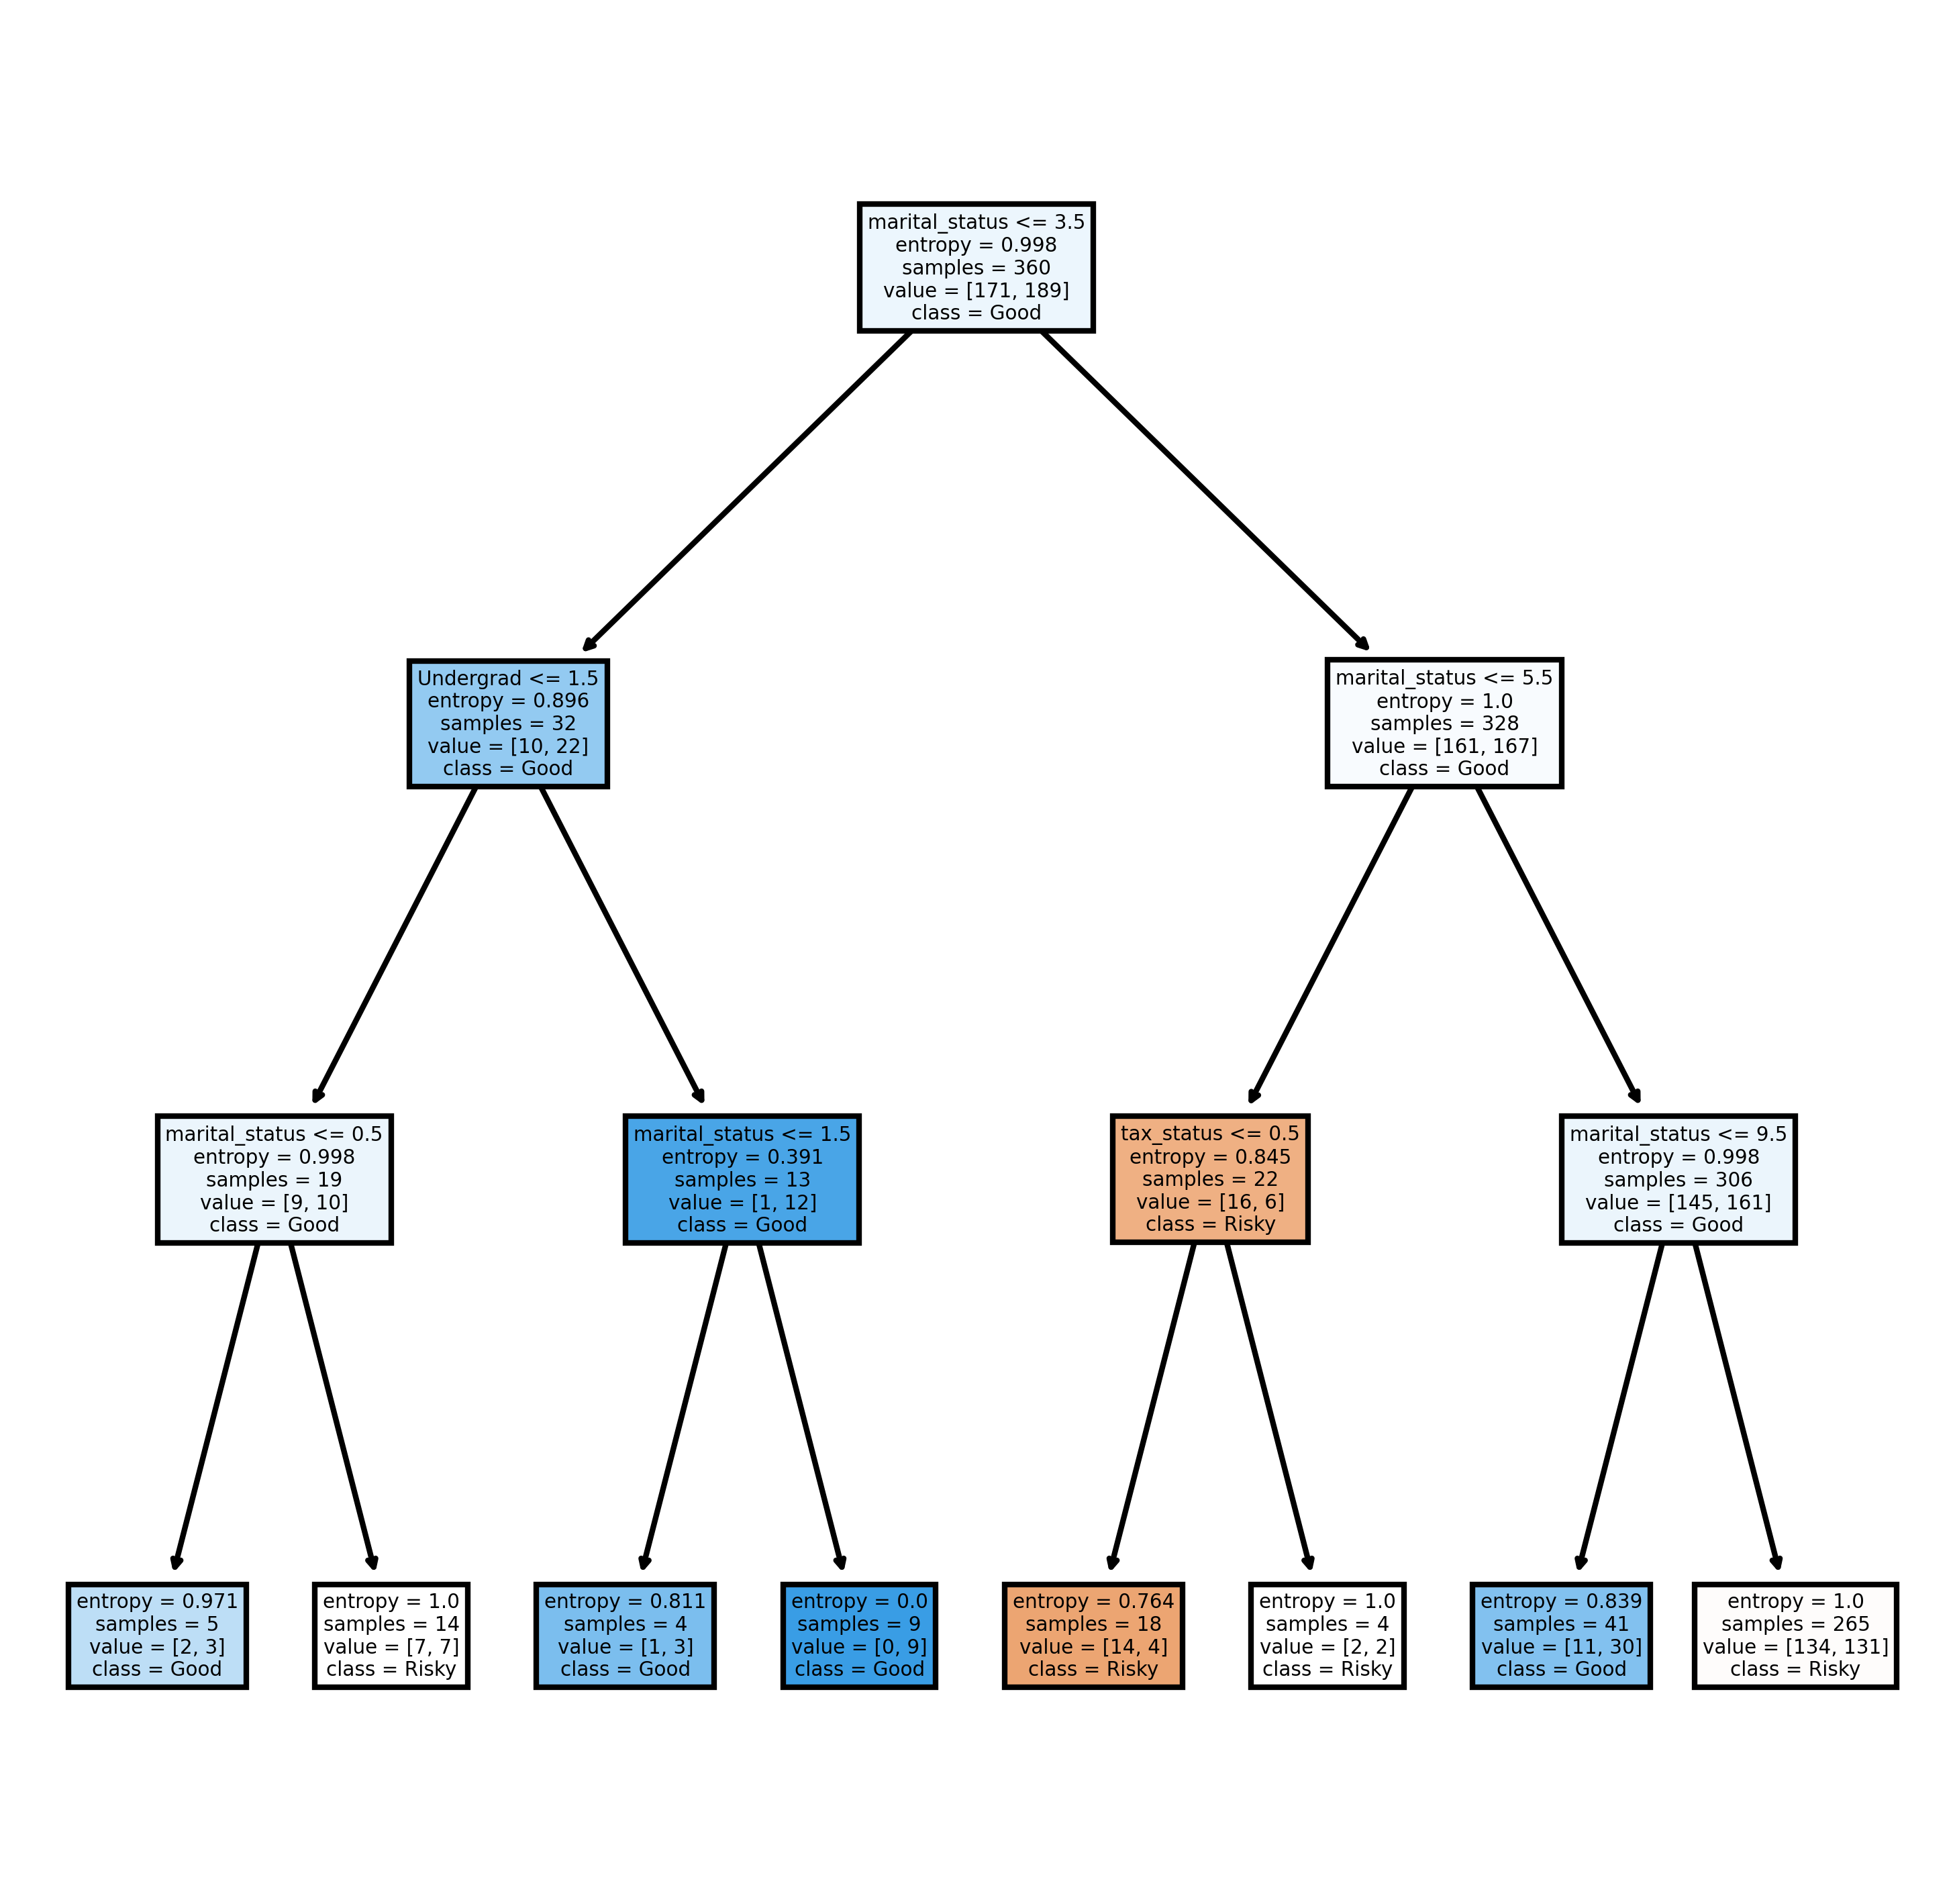

In [454]:
fn=['Undergrad','marital_status','Urban','tax_status']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(dt,feature_names = fn,class_names=cn,filled = True);




# Undergrad	marital_status	work_ex	Urban	tax_status

In [455]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [456]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [457]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.5611111111111111


array([[157,  14],
       [144,  45]], dtype=int64)

In [458]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.475


array([[ 95,  22],
       [104,  19]], dtype=int64)

In [459]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True)

In [460]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

Without setting any hyper-parameters

In [461]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

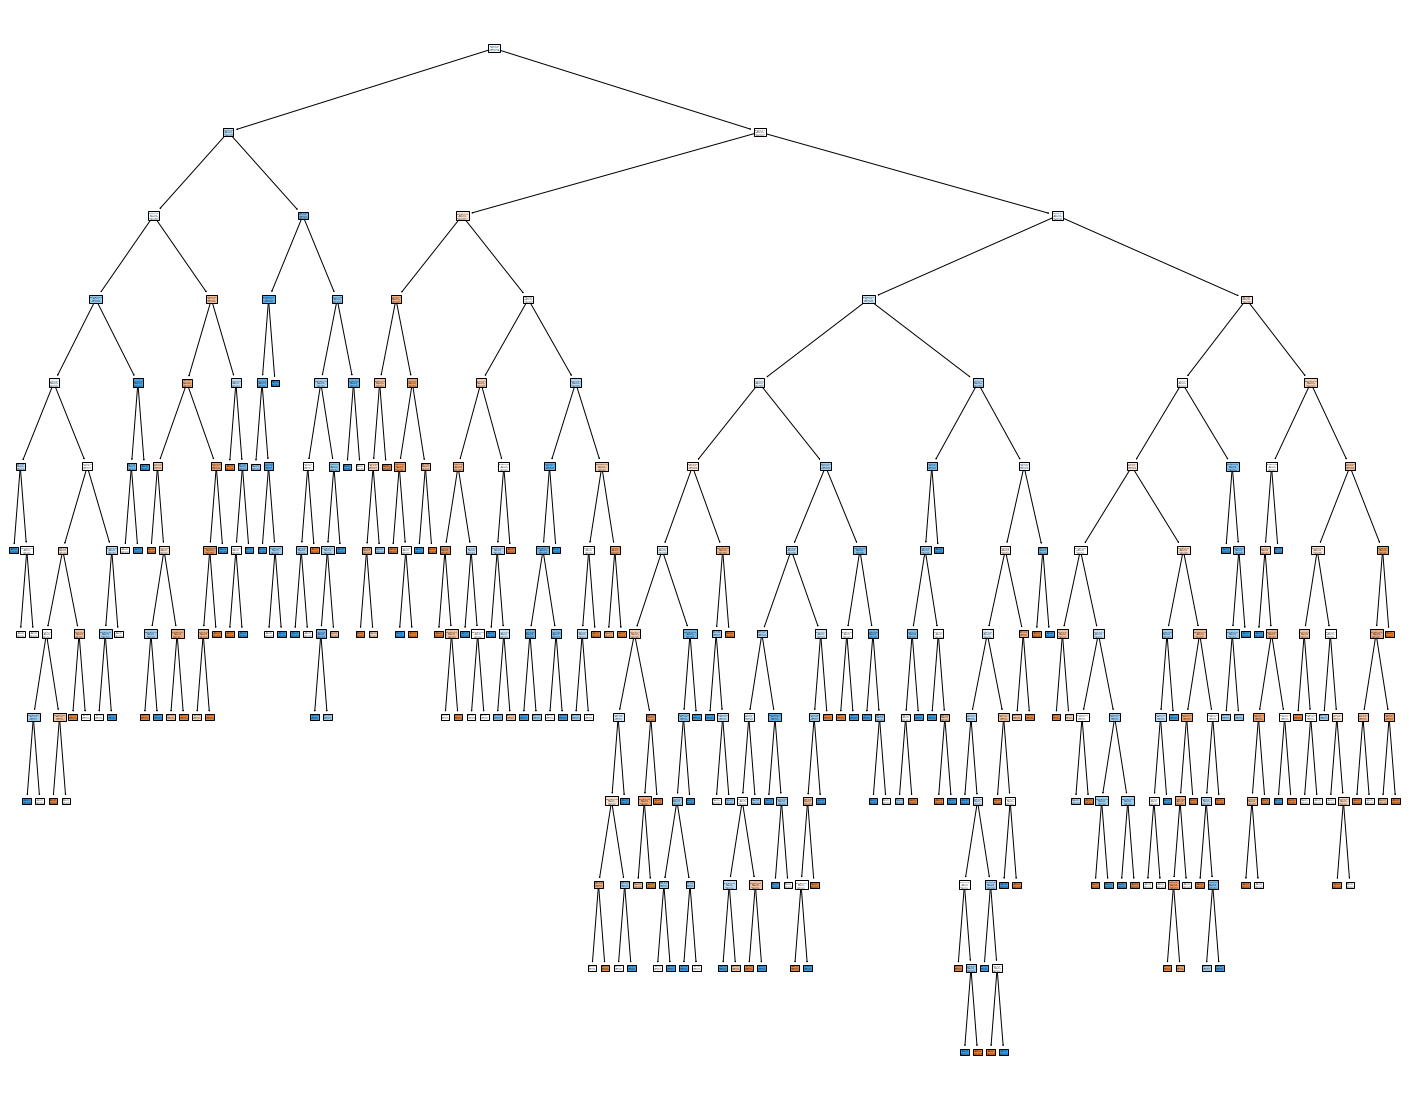

In [462]:
gph = get_dt_graph(dt_default)

In [463]:
evaluate_model(dt_default)

Train Accuracy : 0.8222222222222222
Train Confusion Matrix:
[[156  15]
 [ 49 140]]
--------------------------------------------------
Test Accuracy : 0.45416666666666666
Test Confusion Matrix:
[[64 53]
 [78 45]]


Controlling the depth of the tree

In [464]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

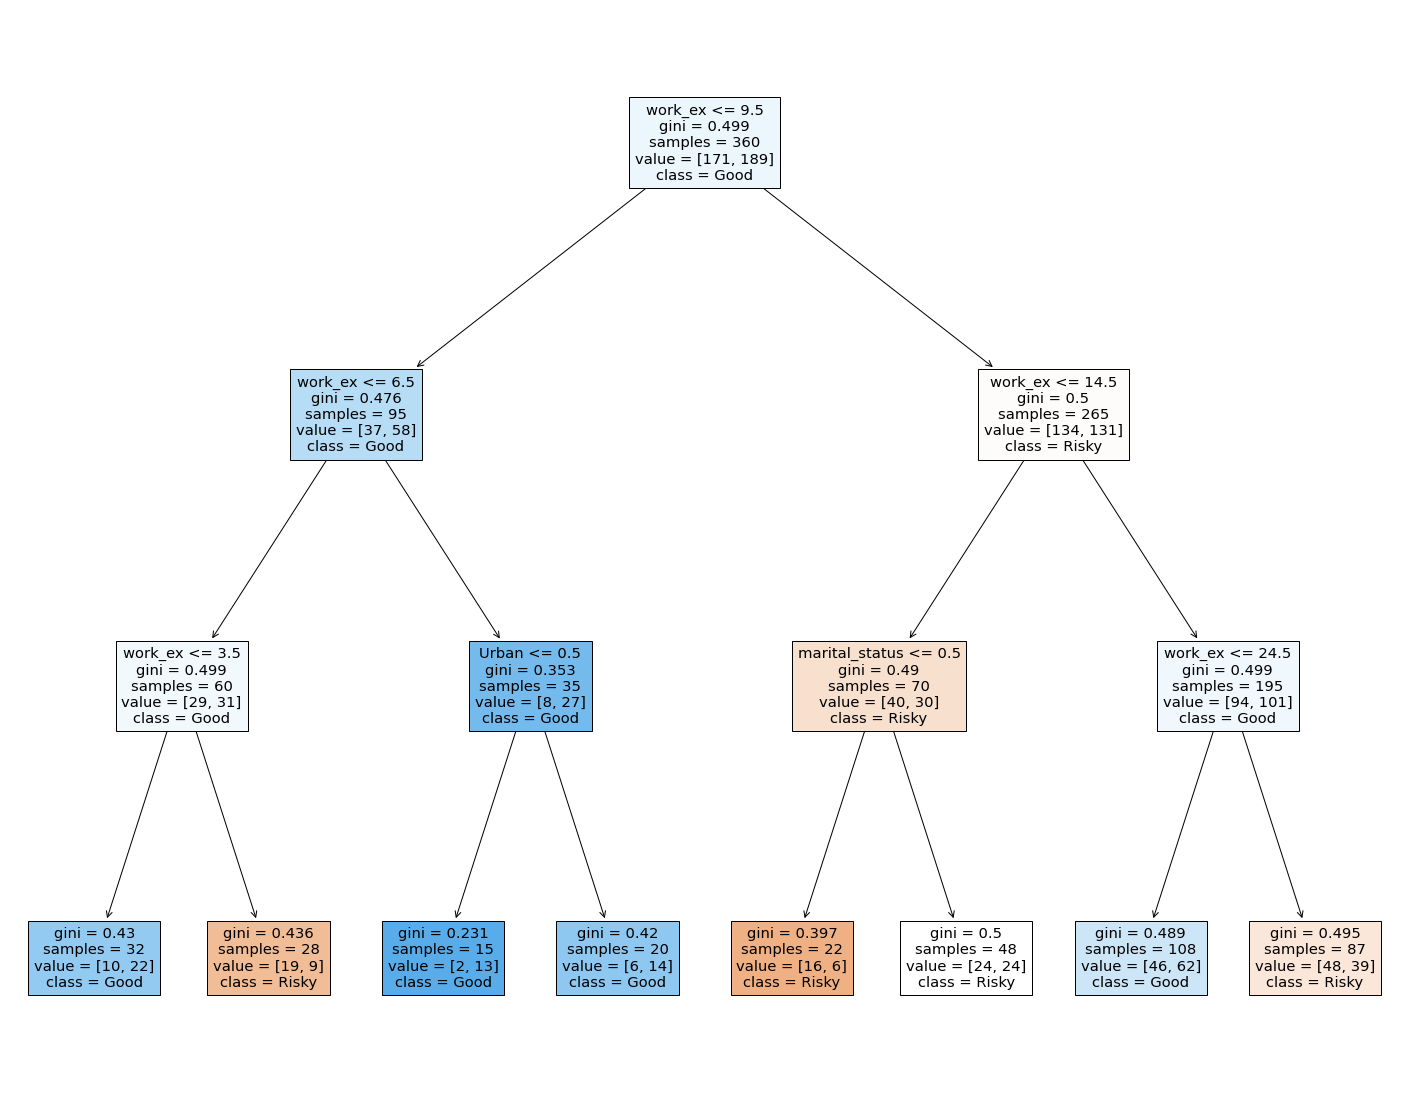

In [465]:
gph = get_dt_graph(dt_depth)

In [466]:
evaluate_model(dt_depth)

Train Accuracy : 0.6055555555555555
Train Confusion Matrix:
[[107  64]
 [ 78 111]]
--------------------------------------------------
Test Accuracy : 0.49166666666666664
Test Confusion Matrix:
[[65 52]
 [70 53]]


In [467]:
print(classification_report(y_test, dt_depth.predict(X_test)))

              precision    recall  f1-score   support

           0       0.48      0.56      0.52       117
           1       0.50      0.43      0.46       123

    accuracy                           0.49       240
   macro avg       0.49      0.49      0.49       240
weighted avg       0.49      0.49      0.49       240



Specifying minimum samples before split

In [469]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

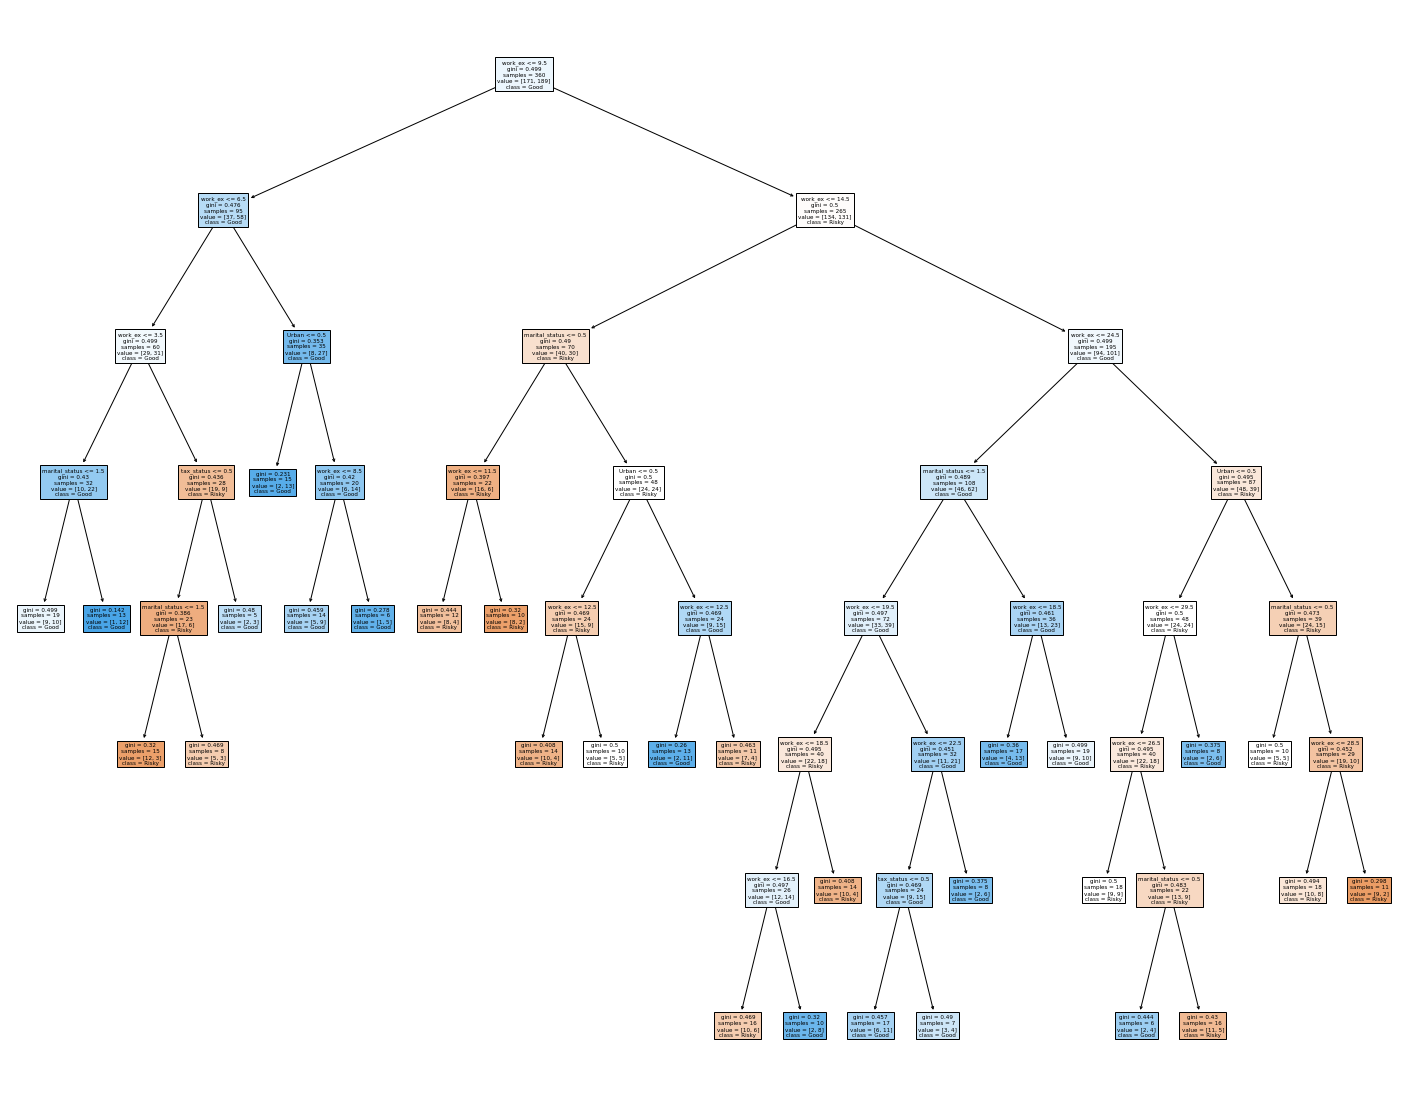

In [470]:
gph = get_dt_graph(dt_min_split) 

In [471]:
evaluate_model(dt_min_split)

Train Accuracy : 0.6777777777777778
Train Confusion Matrix:
[[119  52]
 [ 64 125]]
--------------------------------------------------
Test Accuracy : 0.4708333333333333
Test Confusion Matrix:
[[54 63]
 [64 59]]


In [472]:
print(classification_report(y_test, dt_min_split.predict(X_test)))

              precision    recall  f1-score   support

           0       0.46      0.46      0.46       117
           1       0.48      0.48      0.48       123

    accuracy                           0.47       240
   macro avg       0.47      0.47      0.47       240
weighted avg       0.47      0.47      0.47       240



Specifying minimum samples in leaf node

In [473]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

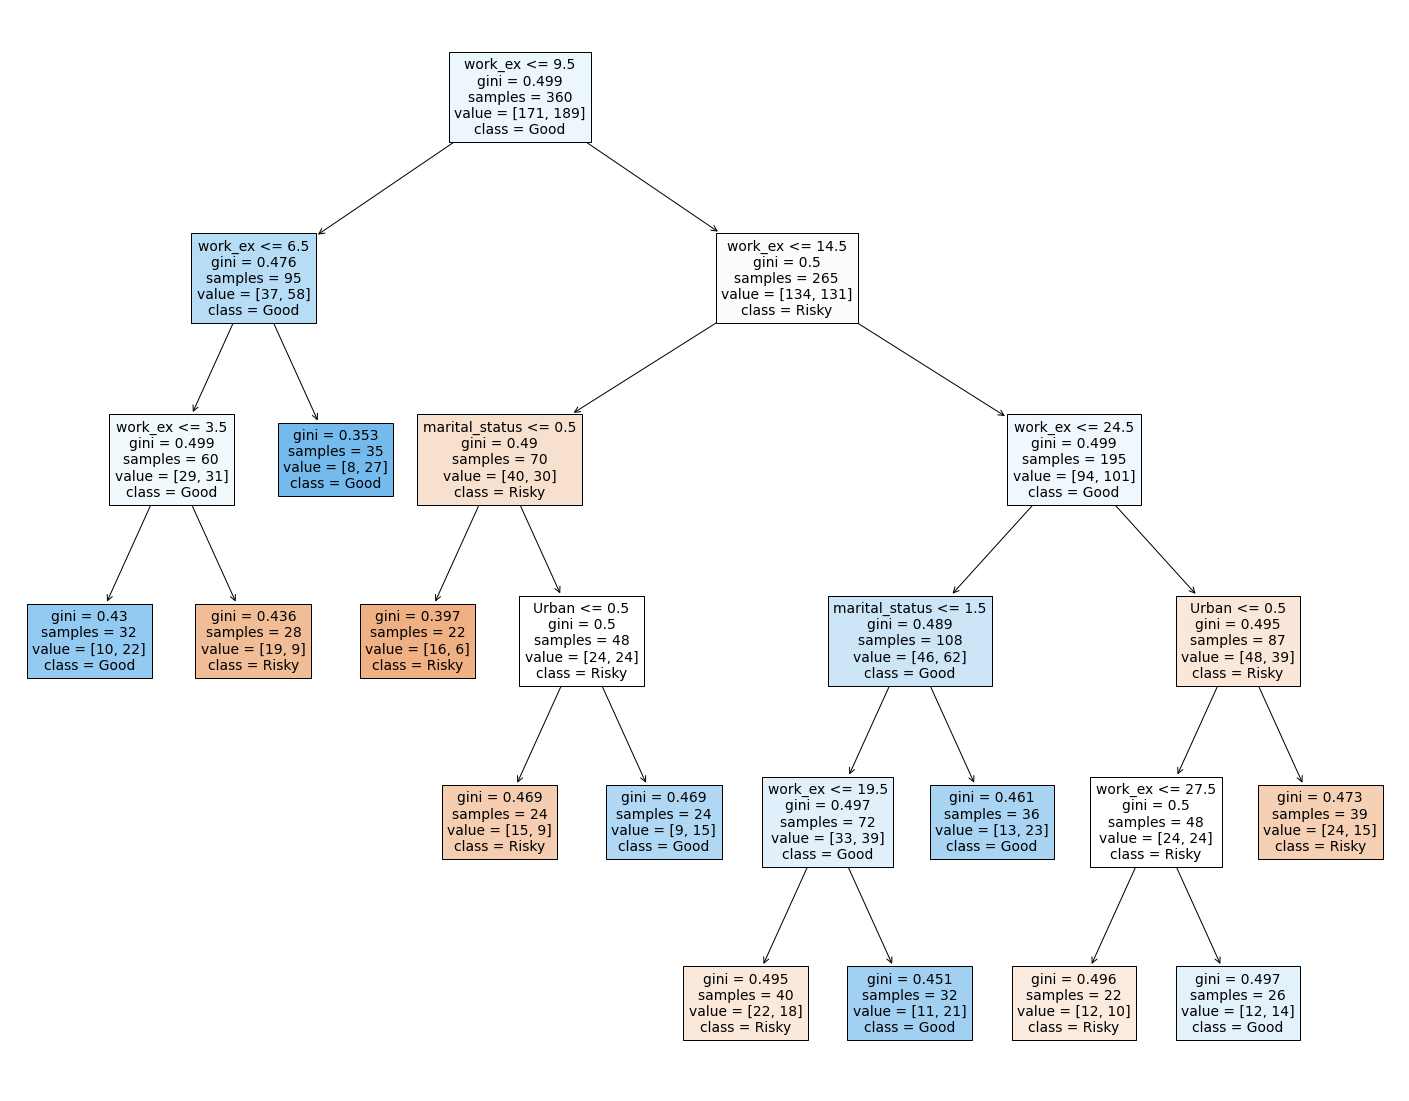

In [474]:
gph = get_dt_graph(dt_min_leaf)

In [475]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.6388888888888888
Train Confusion Matrix:
[[108  63]
 [ 67 122]]
--------------------------------------------------
Test Accuracy : 0.475
Test Confusion Matrix:
[[53 64]
 [62 61]]


Using Entropy instead of Gini

In [476]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

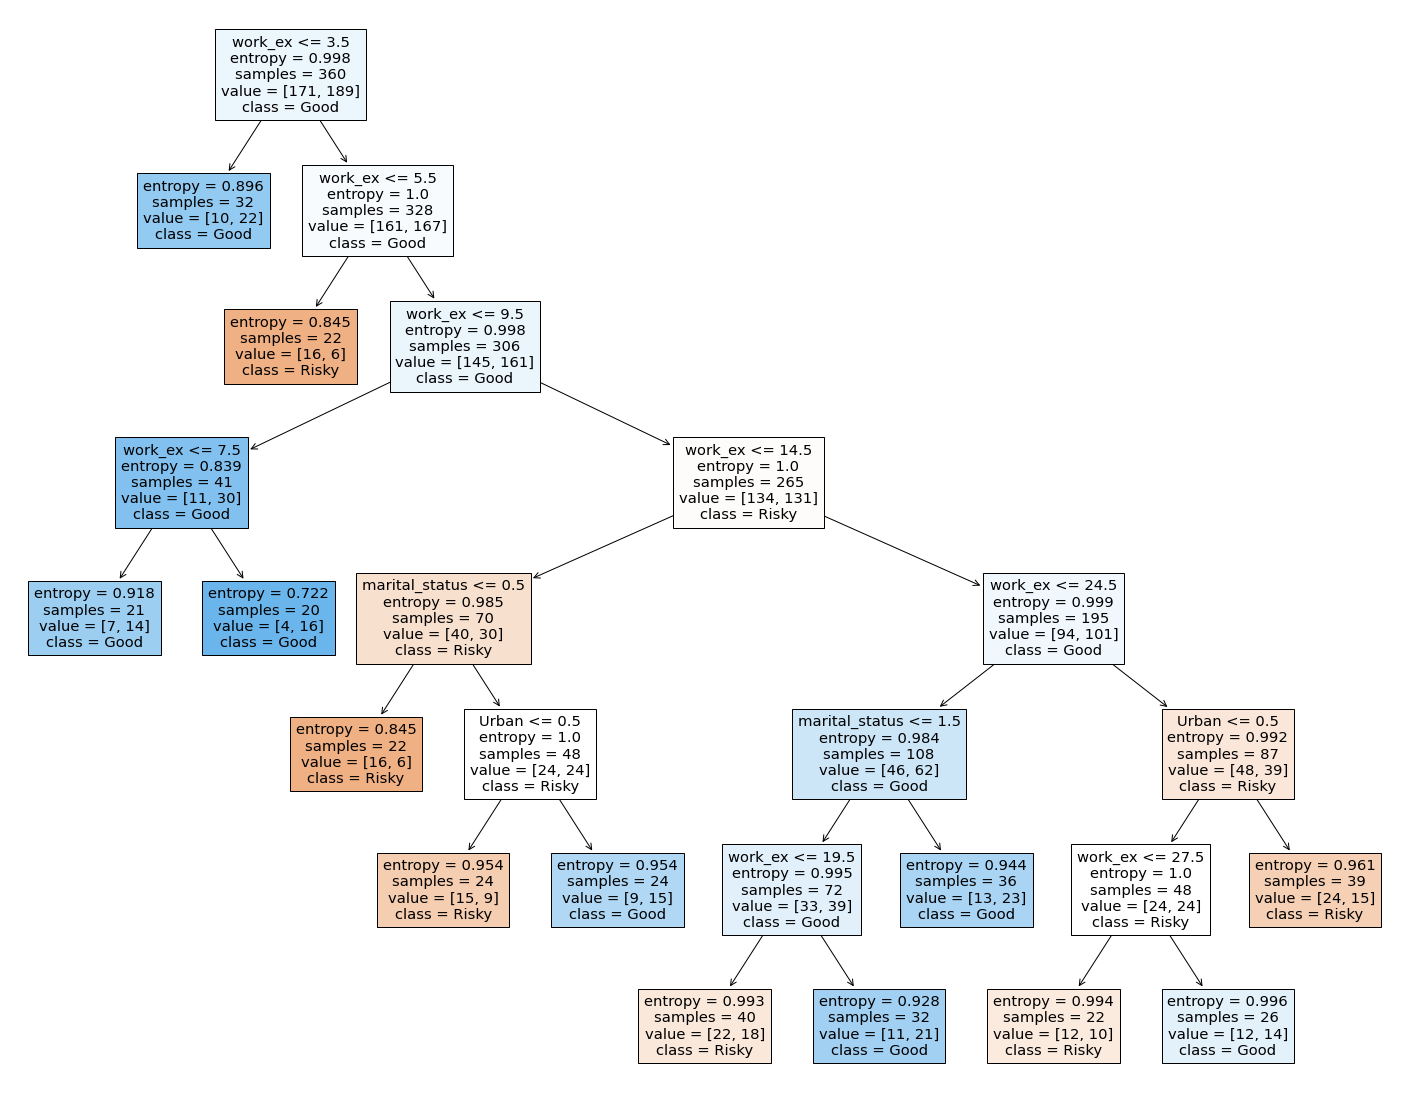

In [477]:
gph = get_dt_graph(dt_min_leaf_entropy)

In [478]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.6388888888888888
Train Confusion Matrix:
[[105  66]
 [ 64 125]]
--------------------------------------------------
Test Accuracy : 0.4708333333333333
Test Confusion Matrix:
[[46 71]
 [56 67]]


In [479]:
print(classification_report(y_test, dt_min_leaf_entropy.predict(X_test)))

              precision    recall  f1-score   support

           0       0.45      0.39      0.42       117
           1       0.49      0.54      0.51       123

    accuracy                           0.47       240
   macro avg       0.47      0.47      0.47       240
weighted avg       0.47      0.47      0.47       240



# Hyper-parameter tuning

In [480]:
dt = DecisionTreeClassifier(random_state=42)

In [481]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [482]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [483]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [484]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008191,0.005557,0.002990,2.064765e-07,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.488889,0.500000,0.533333,0.444444,0.491667,0.031793,33
1,0.004734,0.000431,0.002491,8.640011e-04,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.488889,0.500000,0.533333,0.444444,0.491667,0.031793,33
2,0.004235,0.001086,0.002242,4.317082e-04,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.488889,0.500000,0.533333,0.444444,0.491667,0.031793,33
3,0.003333,0.000985,0.001030,5.947557e-04,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.488889,0.500000,0.522222,0.444444,0.488889,0.028328,36
4,0.000343,0.000595,0.000000,0.000000e+00,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.522222,0.455556,0.522222,0.377778,0.469444,0.059512,41


In [485]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
45,0.006257,0.006257,0.000000,0.000000,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.533333,0.577778,0.577778,0.488889,0.544444,0.036851,1
40,0.000000,0.000000,0.000000,0.000000,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.533333,0.555556,0.577778,0.488889,0.538889,0.032867,2
15,0.003799,0.000326,0.002746,0.000829,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.533333,0.522222,0.577778,0.488889,0.530556,0.031793,3
20,0.003387,0.000401,0.002023,0.000051,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.533333,0.522222,0.577778,0.488889,0.530556,0.031793,3
7,0.010156,0.007674,0.001245,0.000431,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.544444,0.522222,0.566667,0.477778,0.527778,0.032867,5


In [486]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

In [487]:
dt_best = grid_search.best_estimator_

In [488]:
evaluate_model(dt_best)

Train Accuracy : 0.7055555555555556
Train Confusion Matrix:
[[122  49]
 [ 57 132]]
--------------------------------------------------
Test Accuracy : 0.5208333333333334
Test Confusion Matrix:
[[64 53]
 [62 61]]


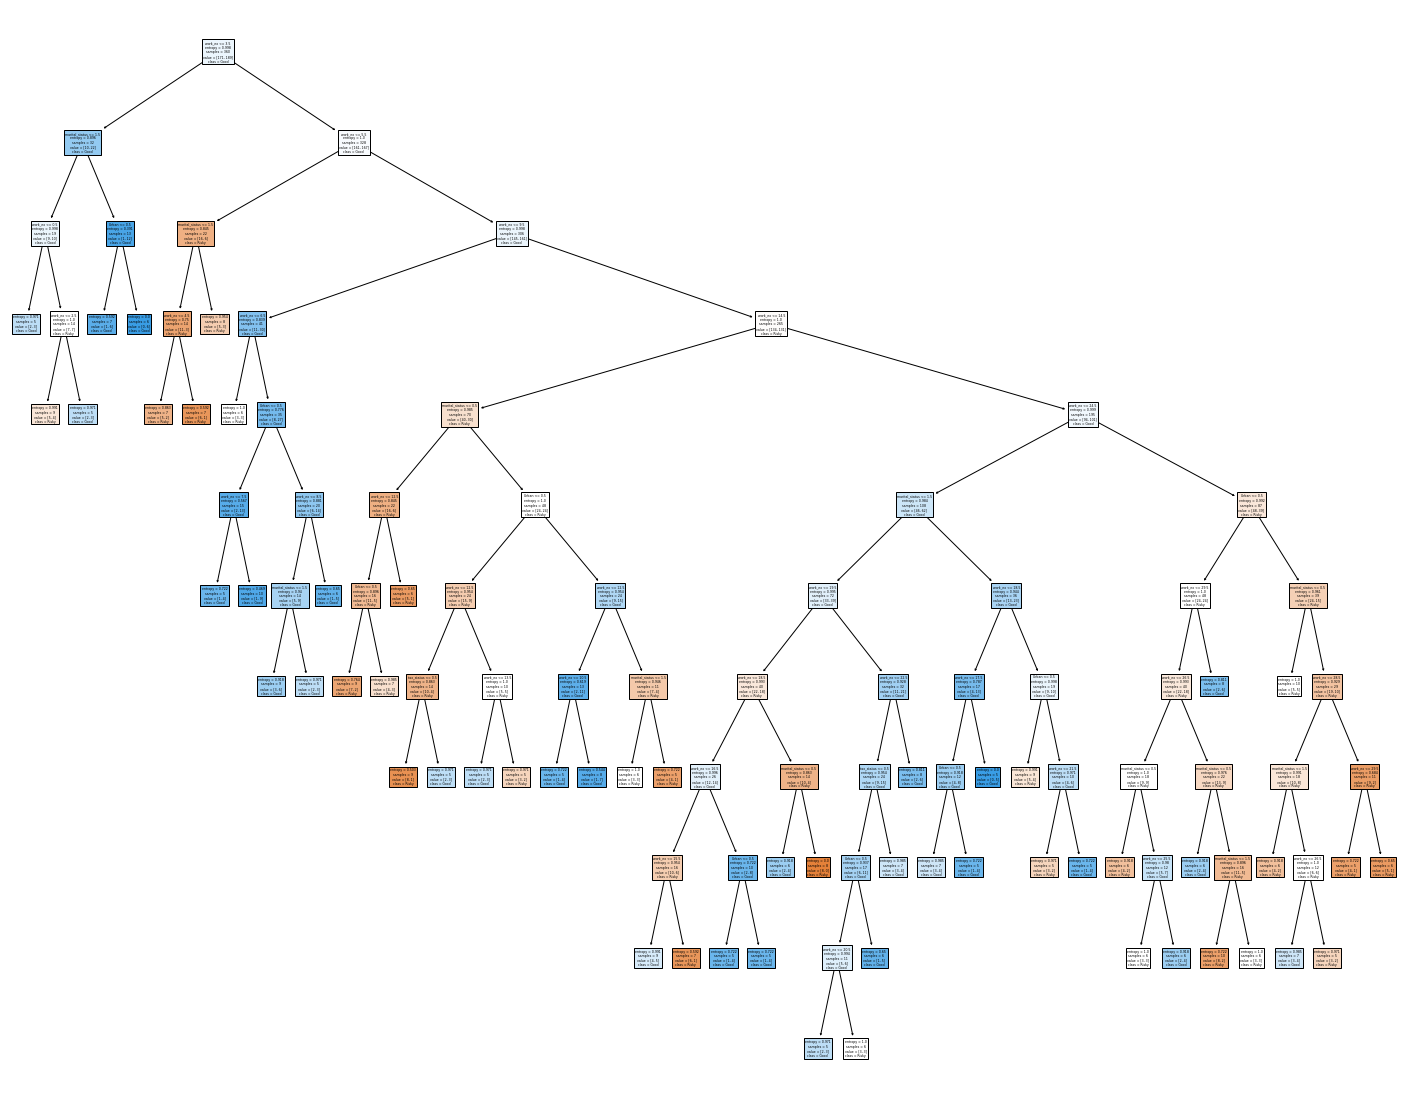

In [489]:
get_dt_graph(dt_best)

In [490]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.51      0.55      0.53       117
           1       0.54      0.50      0.51       123

    accuracy                           0.52       240
   macro avg       0.52      0.52      0.52       240
weighted avg       0.52      0.52      0.52       240



In [491]:
# Checking accuracy of model
dt_min_leaf_entropy.score(X_test, y_test)

0.4708333333333333

In [492]:
# Checking accuracy of model
dt_best.score(X_test, y_test)

0.5208333333333334